In [2]:
import pandas as pd
import seaborn as sb
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_excel('sales_data.xlsx')
dfTeam = pd.read_excel('sales_data.xlsx','Sales Team Sheet')

df.head()

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Price,Unit Cost
0,SO - 000101,In-Store,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-14,2018-06-19,USD,6,15,259,12,5,0.075,1963.1,1001.181
1,SO - 000102,Online,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-22,2018-07-02,USD,14,20,196,27,3,0.075,3939.6,3348.660
2,SO - 000103,Distributor,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-21,2018-07-01,USD,21,16,213,16,1,0.050,1775.5,781.220
3,SO - 000104,Wholesale,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-02,2018-06-07,USD,28,48,107,23,8,0.075,2324.9,1464.687
4,SO - 000105,Distributor,WARE-NMK1003,2018-04-10,2018-05-31,2018-06-16,2018-06-26,USD,22,49,111,26,8,0.100,1822.4,1476.144


In [4]:
rows = df.filter(items=['_SalesTeamID'])
print(rows)
df['companyNames'] = 'unknown'
df['companyRegion'] = 'unknown'


      _SalesTeamID
0                6
1               14
2               21
3               28
4               22
...            ...
7986             9
7987            14
7988            14
7989            20
7990             6

[7991 rows x 1 columns]


In [5]:
# df['_SalesTeamID'].unique()

for index, row in dfTeam.iterrows():
    index = index + 1
    df.loc[df['_SalesTeamID'] == index, 'companyNames'] = row['Sales Team']
    df.loc[df['_SalesTeamID'] == index, 'companyRegion'] = row['Region']
print(df['_SalesTeamID'].unique())
    

[ 6 14 21 28 22 12 10  4 23  8  9  5 25  2  7 24 18 20 13 19 17 26 11 15
 16 27  3  1]


In [6]:
totalLength = len(df.index)
companyCount = len(df['_SalesTeamID'].unique())
dividedLength = totalLength / companyCount
print(dividedLength)

285.39285714285717


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 [Text(0, 0, 'Joshua Bennett'),
  Text(1, 0, 'Paul Holmes'),
  Text(2, 0, 'Samuel Fowler'),
  Text(3, 0, 'Carlos Miller'),
  Text(4, 0, 'Joe Price'),
  Text(5, 0, 'Carl Nguyen'),
  Text(6, 0, 'Jonathan Hawkins'),
  Text(7, 0, 'Chris Armstrong'),
  Text(8, 0, 'Douglas Tucker'),
  Text(9, 0, 'George Lewis'),
  Text(10, 0, 'Joshua Ryan'),
  Text(11, 0, 'Stephen Payne'),
  Text(12, 0, 'Patrick Graham'),
  Text(13, 0, 'Keith Griffin'),
  Text(14, 0, 'Shawn Cook'),
  Text(15, 0, 'Roy Rice'),
  Text(16, 0, 'Shawn Wallace'),
  Text(17, 0, 'Anthony Torres'),
  Text(18, 0, 'Todd Roberts'),
  Text(19, 0, 'Nicholas Cunningham'),
  Text(20, 0, 'Frank Brown'),
  Text(21, 0, 'Donald Reynolds'),
  Text(22, 0, 'Joshua Little'),
  Text(23, 0, 'Roger Alexander'),
  Text(24, 0, 'Anthony Berry'),
  Text(25, 0, 'Shawn Torres'),
  Text(26, 0, 'Jerry Green'),
  Text(27, 0, 'Adam He

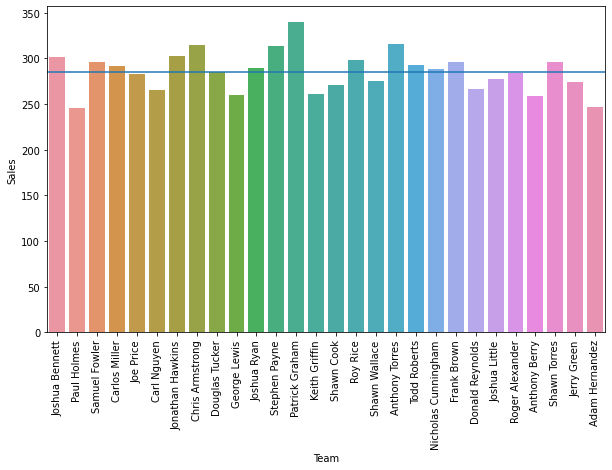

In [7]:
plt.figure(figsize=(10,6))
dfSales = df.groupby("_SalesTeamID")._SalesTeamID.count()
sb.barplot(x=df['companyNames'].unique(),y=dfSales)
plt.axhline(y=dividedLength)
plt.xlabel('Team')
plt.ylabel('Sales')
plt.xticks(rotation=90)

In [8]:
df.head()

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Price,Unit Cost,companyNames,companyRegion
0,SO - 000101,In-Store,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-14,2018-06-19,USD,6,15,259,12,5,0.075,1963.1,1001.181,Joshua Bennett,Northeast
1,SO - 000102,Online,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-22,2018-07-02,USD,14,20,196,27,3,0.075,3939.6,3348.660,Paul Holmes,Midwest
2,SO - 000103,Distributor,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-21,2018-07-01,USD,21,16,213,16,1,0.050,1775.5,781.220,Samuel Fowler,Midwest
3,SO - 000104,Wholesale,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-02,2018-06-07,USD,28,48,107,23,8,0.075,2324.9,1464.687,Carlos Miller,West
4,SO - 000105,Distributor,WARE-NMK1003,2018-04-10,2018-05-31,2018-06-16,2018-06-26,USD,22,49,111,26,8,0.100,1822.4,1476.144,Joe Price,Northeast


In [13]:
dfNorthEast = df.loc[df['companyRegion'] == 'Northeast']
dfSalesNortheast = dfNorthEast.groupby("_SalesTeamID")._SalesTeamID.count()
dfNorthEast.tail()


,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Price,Unit Cost,companyNames,companyRegion
7979,SO - 0008080,In-Store,WARE-NBV1002,2020-09-26,2020-12-29,2021-01-20,2021-01-27,USD,2,7,80,32,7,0.300,964.8,492.048,Keith Griffin,Northeast
7981,SO - 0008082,Distributor,WARE-PUJ1005,2020-09-26,2020-12-29,2021-01-07,2021-01-11,USD,22,12,279,17,1,0.100,1835.8,1303.418,Joe Price,Northeast
7982,SO - 0008083,In-Store,WARE-NMK1003,2020-09-26,2020-12-29,2021-01-21,2021-01-26,USD,4,42,132,21,3,0.100,5051.8,4243.512,Chris Armstrong,Northeast
7983,SO - 0008084,Distributor,WARE-NMK1003,2020-09-26,2020-12-29,2021-01-20,2021-01-30,USD,22,44,121,22,4,0.150,3959.7,2930.178,Joe Price,Northeast
7990,SO - 0008091,In-Store,WARE-UHY1004,2020-09-26,2020-12-30,2021-01-13,2021-01-19,USD,6,41,237,43,5,0.075,2211.0,1370.820,Joshua Bennett,Northeast


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Joshua Bennett'),
  Text(1, 0, 'Joe Price'),
  Text(2, 0, 'Chris Armstrong'),
  Text(3, 0, 'Keith Griffin'),
  Text(4, 0, 'Frank Brown'),
  Text(5, 0, 'Shawn Torres'),
  Text(6, 0, 'Adam Hernandez')])

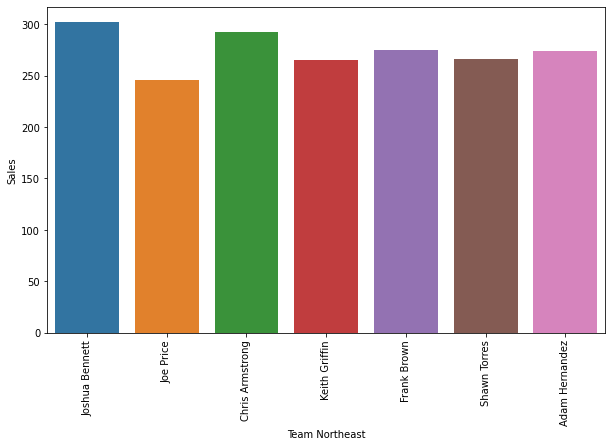

In [15]:
plt.figure(figsize=(10,6))

sb.barplot(x=dfNorthEast['companyNames'].unique(),y=dfSalesNortheast)

plt.xlabel('Team Northeast')
plt.ylabel('Sales')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Paul Holmes'),
  Text(1, 0, 'Samuel Fowler'),
  Text(2, 0, 'Carl Nguyen'),
  Text(3, 0, 'Douglas Tucker'),
  Text(4, 0, 'Joshua Ryan'),
  Text(5, 0, 'Shawn Cook'),
  Text(6, 0, 'Roy Rice'),
  Text(7, 0, 'Roger Alexander')])

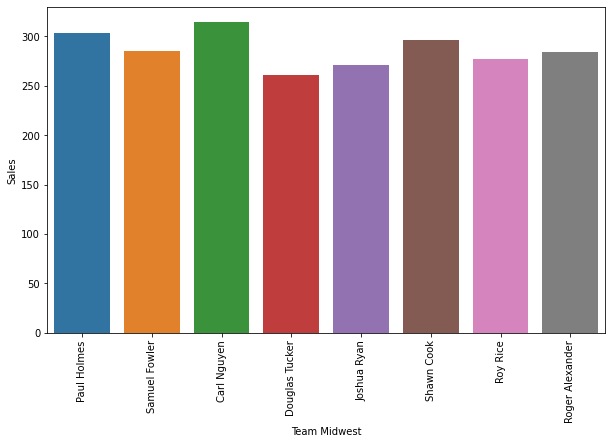

In [18]:
dfMidwest = df.loc[df['companyRegion'] == 'Midwest']
dfSalesMidwest = dfMidwest.groupby("_SalesTeamID")._SalesTeamID.count()

plt.figure(figsize=(10,6))

sb.barplot(x=dfMidwest['companyNames'].unique(),y=dfSalesMidwest)

plt.xlabel('Team Midwest')
plt.ylabel('Sales')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Stephen Payne'),
  Text(1, 0, 'Patrick Graham'),
  Text(2, 0, 'Shawn Wallace'),
  Text(3, 0, 'Nicholas Cunningham'),
  Text(4, 0, 'Donald Reynolds'),
  Text(5, 0, 'Joshua Little')])

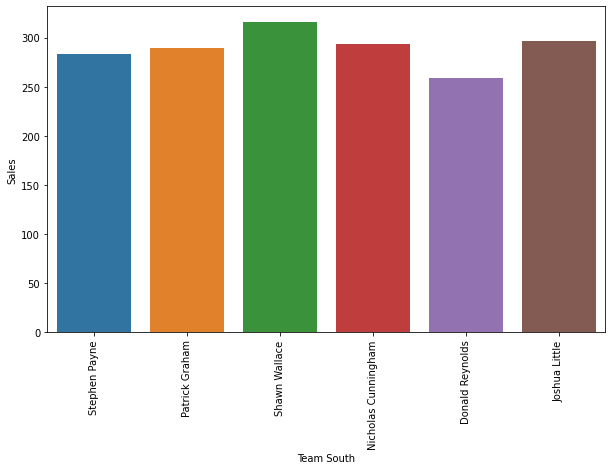

In [20]:
dfSouth = df.loc[df['companyRegion'] == 'South']
dfSalesSouth = dfSouth.groupby("_SalesTeamID")._SalesTeamID.count()

plt.figure(figsize=(10,6))

sb.barplot(x=dfSouth['companyNames'].unique(),y=dfSalesSouth)

plt.xlabel('Team South')
plt.ylabel('Sales')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Carlos Miller'),
  Text(1, 0, 'Jonathan Hawkins'),
  Text(2, 0, 'George Lewis'),
  Text(3, 0, 'Anthony Torres'),
  Text(4, 0, 'Todd Roberts'),
  Text(5, 0, 'Anthony Berry'),
  Text(6, 0, 'Jerry Green')])

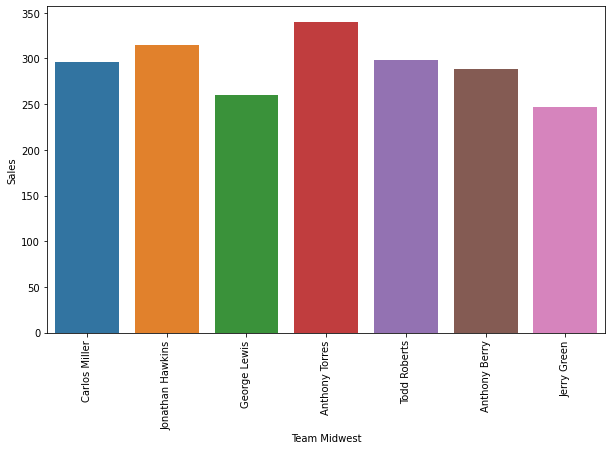

In [21]:
dfWest = df.loc[df['companyRegion'] == 'West']
dfSalesWest = dfWest.groupby("_SalesTeamID")._SalesTeamID.count()

plt.figure(figsize=(10,6))

sb.barplot(x=dfWest['companyNames'].unique(),y=dfSalesWest)

plt.xlabel('Team Midwest')
plt.ylabel('Sales')
plt.xticks(rotation=90)